### This code implement KNN using scikit learn package

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [6]:
# Import dataset
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
# Rewriting column names
# Found in abalone.names file in the UCI machine learning repository
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings",]

# Remove sex column since it doesnt contribute to the age variable
abalone = abalone.drop("Sex", axis=1)

abalone.head(4)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


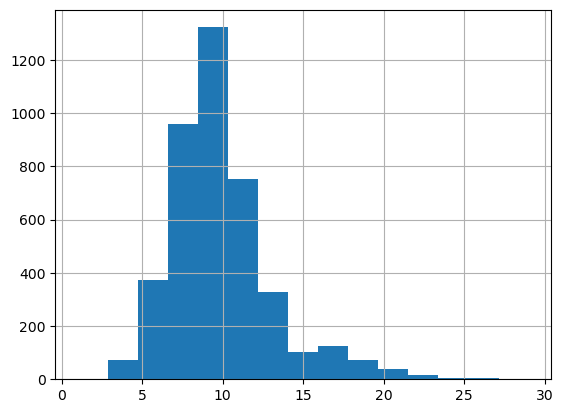

In [7]:
# EXPLORATORY DATA ANALYSIS
abalone["Rings"].hist(bins=15)
plt.show()

In [8]:
# Finding the correlation among the variables
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [11]:
#Creating the vectors
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

# New sample data point which we want to categorize using KNN
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208,])

### Splitting into train and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

### Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)   # initialize and set hyperparameter

knn_model.fit(X_train, y_train)  # fit the model

KNeighborsRegressor(n_neighbors=3)

### Using scikit-learn to Inspect Model Fit
> We will be using Root Mean Squared Error as evaluation metric

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluating train set
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [18]:
# evaluation test set
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

In this code block, you evaluate the error on data that wasn’t yet known by the model. This more-realistic RMSE is slightly higher than before. The RMSE measures the average error of the predicted age, so you can interpret this as having, on average, an error of 1.65 years. Whether an improvement from 2.37 years to 1.65 years is good is case specific. At least you’re getting closer to correctly estimating the age.<br><br>

We will now optimize the model by optimizing hyperparamters.<br>
>Note: Since we are using the model in its very basic stage, we can infer from the RMSE values that the model is overfit as of now.

### Plotting the fit of the model

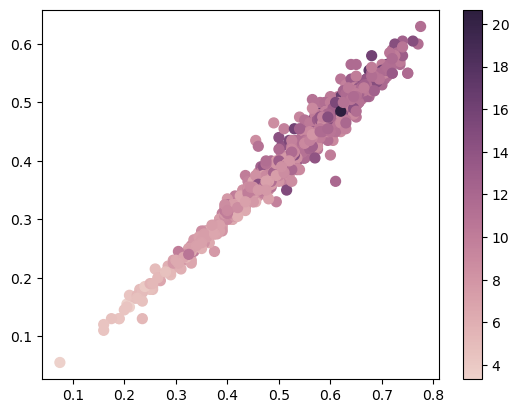

In [19]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Remember from before that the first two columns are Length and Diameter. They are strongly correlated, as you’ve seen in the correlations table.

You use c to specify that the predicted values (test_preds) should be used as a colorbar. The argument s is used to specify the size of the points in the scatter plot. You use cmap to specify the cubehelix_palette color map.

### Checking if the same trend exists in actual test set ( not the predicted one as done before)

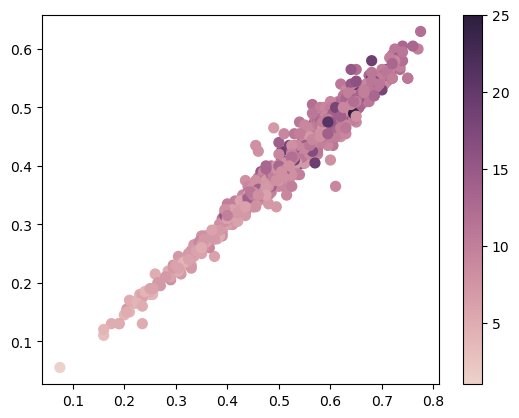

In [20]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

We can now confirm that the trend is true in both the actual test set and the predicted test set

### Tune and Optimize kNN in Python Using scikit-learn

#### Improving kNN Performances in scikit-learn Using GridSearchCV

Until now, we have always worked with k=3 in the kNN algorithm, but the best value for k is something that you need to find empirically for each dataset.

>When we use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

>If we use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.

>If we have multiple data points, the impact of one extremely different neighbor will be much less.

>If we use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

Here, you use GridSearchCV to fit the model. In short, GridSearchCV repeatedly fits kNN regressors on a part of the data and tests the performances on the remaining part of the data. Doing this repeatedly will yield a reliable estimate of the predictive performance of each of the values for k. In this example, you test the values from 1 to 50.

In [24]:
# Accessing the best performing value of K using best_params_
gridsearch.best_params_

{'n_neighbors': 25}

In [25]:
# using the best value of k. ie. 25
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_rmse)

2.0731180327543384
2.1700197339962175


Note that the RMSE value of test set is reduced from 2.375 to 2.17.<br>
We will now further optimize the model.

#### Improving KNN performance by adding Weighted Average of Neighbors Based on Distance
We will now use weights on the distance of the neighbors.<br>
But this will further affect the best value of 'k' that we calculated. Hence we will have to use GridSearchCV again.

In [29]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [30]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

#### Improving KNN performance by Bagging
As a third step for kNN tuning, you can use bagging. Bagging is an ensemble method, or a method that takes a relatively straightforward machine learning model and fits a large number of those models with slight variations in each fit. Bagging often uses decision trees, but kNN works perfectly as well.

Ensemble methods are often more performant than single models. One model can be wrong from time to time, but the average of a hundred models should be wrong less often. The errors of different individual models are likely to average each other out, and the resulting prediction will be less variable.

In [40]:
# Finding best value of k again
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [41]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [42]:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1682153665037003

#### We reduced the RMSE value from 2.375 to 2.168

In [45]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [47]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
